# Import Libraries

In [28]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#NLP Libraries
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rishi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


# Load Data

In [2]:
data = pd.read_csv('amazon_alexa.tsv',sep='\t')

data.shape

(3150, 5)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
data.isnull().any()

rating              False
date                False
variation           False
verified_reviews    False
feedback            False
dtype: bool

In [6]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [7]:
data['length'] = data['verified_reviews'].apply(len)
data.shape

(3150, 6)

In [8]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [9]:
data.groupby('rating').describe()

feedback                                     length              \
          count mean  std  min  25%  50%  75%  max   count        mean   
rating                                                                   
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   161.0  195.000000   
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    96.0  249.187500   
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   152.0  207.296053   
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   455.0  178.520879   
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  2286.0  108.444007   

                                                       
               std  min    25%    50%     75%     max  
rating                                                 
1       212.371226  1.0  36.00  120.0  284.00  1124.0  
2       269.595303  1.0  78.75  163.0  309.25  1686.0  
3       272.194706  1.0  54.00  130.0  284.00  1954.0  
4       215.927849  1.0  34.00   99.0  241.00  1360.0  
5       152.116387  1.0  26.00   64.0  135.00  2851.0

# EDA

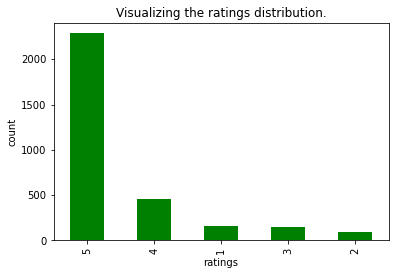

In [10]:
data['rating'].value_counts().plot.bar(color = 'green')
plt.title('Visualizing the ratings distribution.')
plt.xlabel('ratings')
plt.ylabel('count')
plt.show()

In [11]:
data['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

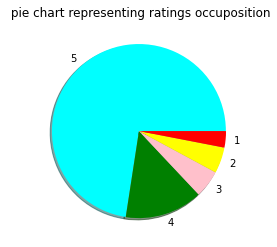

In [12]:
labels = '5', '4', '3', '2', '1'
sizes = [2286, 455, 161, 152, 96]
colors = ['cyan', 'green', 'pink', 'yellow', 'red']
explode = [0.001, 0.001, 0.001, 0.001, 0.001]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title(' pie chart representing ratings occuposition')
plt.show()

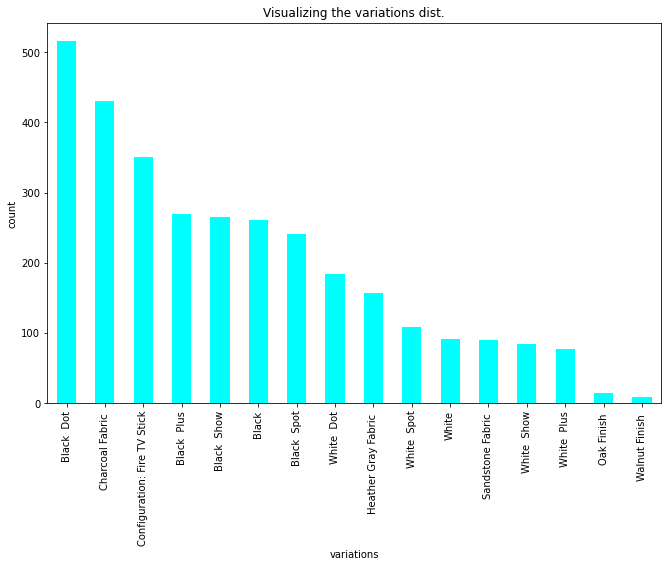

In [13]:
data['variation'].value_counts().plot.bar(color = 'cyan', figsize = (11, 7))
plt.title('Visualizing the variations dist.')
plt.xlabel('variations')
plt.ylabel('count')
plt.show()

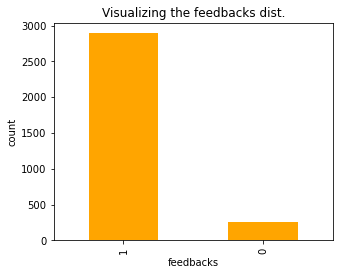

In [14]:
data['feedback'].value_counts().plot.bar(color = 'orange', figsize = (5, 4))
plt.title('Visualizing the feedbacks dist.')
plt.xlabel('feedbacks')
plt.ylabel('count')
plt.show()

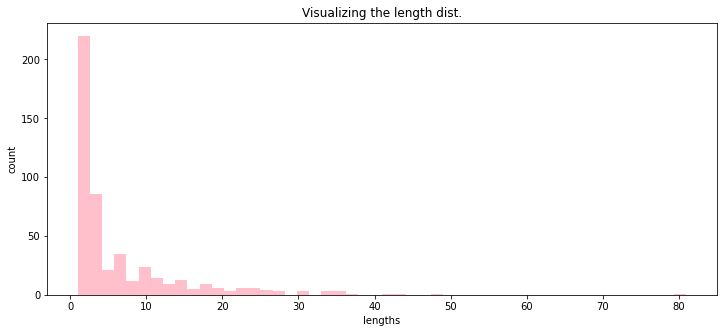

In [15]:
data['length'].value_counts().plot.hist(color = 'pink', figsize = (12, 5), bins = 50)
plt.title('Visualizing the length dist.')
plt.xlabel('lengths')
plt.ylabel('count')
plt.show()

In [16]:
data.length.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [17]:
data[data['length'] == 496]['verified_reviews'].iloc[0]

"We've owned a number of Echo devices, but have viewed them as more of a toy than a tool.  Other than playing music through a sound system, we haven't found much use for them.  We just don't find the voice user interface to be all that efficient.  The Echo Spot solves the efficiency problem by displaying the information that you're routinely interested in.  Furthermore, you can do some basic navigation using the touch screen as well as tailor the settings.  We now use these as bedside clocks."

In [18]:
data[data['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [19]:
data.date.describe()

count          3150
unique           77
top       30-Jul-18
freq           1603
Name: date, dtype: object

In [20]:
data['date'].value_counts()

30-Jul-18    1603
29-Jul-18     482
28-Jul-18     250
26-Jul-18      85
31-Jul-18      81
             ... 
2-Jun-18        2
9-Jun-18        1
29-May-18       1
4-Jun-18        1
13-Jun-18       1
Name: date, Length: 77, dtype: int64

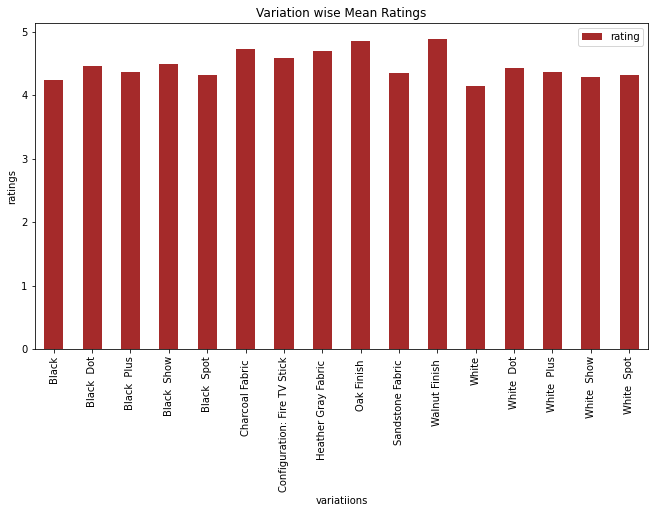

In [21]:
data.groupby('variation').mean()[['rating']].plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Variation wise Mean Ratings")
plt.xlabel('variatiions')
plt.ylabel('ratings')
plt.show()


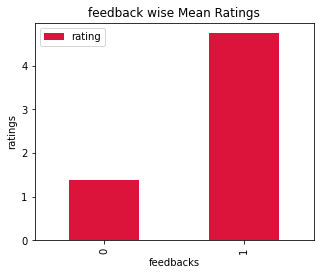

In [22]:
data.groupby('feedback').mean()[['rating']].plot.bar(color = 'crimson', figsize=(5, 4))
plt.title("feedback wise Mean Ratings")
plt.xlabel('feedbacks')
plt.ylabel('ratings')
plt.show()

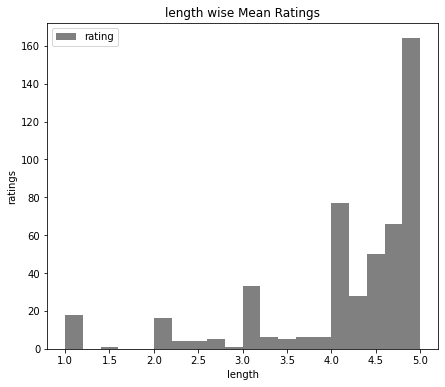

In [23]:
data.groupby('length').mean()[['rating']].plot.hist(color = 'gray', figsize=(7, 6), bins = 20)
plt.title("length wise Mean Ratings")
plt.xlabel('length')
plt.ylabel('ratings')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

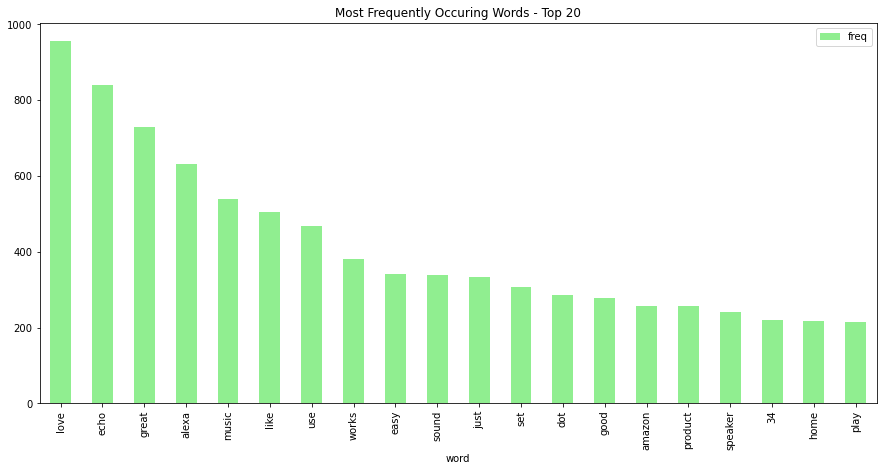

In [24]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.verified_reviews)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])


frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'lightgreen')
plt.title("Most Frequently Occuring Words - Top 20")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

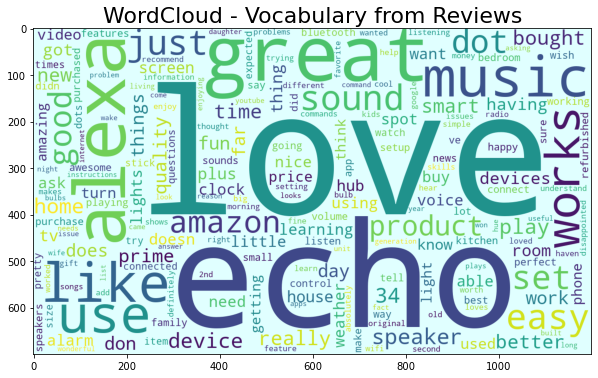

In [27]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan', width = 1200, height = 700).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

# Data Preprocessing

In [29]:
corpus = []

for i in range(0, 3150):
  review = re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)

# Bag of Words

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)

x = cv.fit_transform(corpus).toarray()

y = data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


# Splitting

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
print(x_train.shape)
print(x_test.shape)

(2205, 2500)
(945, 2500)


# Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

# Model

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9941043083900227
Testing Accuracy : 0.9365079365079365
[[ 27  57]
 [  3 858]]


# Xg Boost Model

In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9750566893424036
Testing Accuracy : 0.9333333333333333
[[ 27  57]
 [  6 855]]


# Decision Forest

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9941043083900227
Testing Accuracy : 0.9312169312169312
[[ 41  43]
 [ 22 839]]
